Q1: Using the default settings, train an SVM on the Diabetes (from Prac 4), Sonar andIonosphere datasets (available on the course web page, details below and available from the UCI machine learning repository).  Use the default training/test set percentage split in Weka.  Record your results (classification rate and confusion matrix).

In [51]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [36]:
diabetes = pd.read_csv('pima_indians_diabetes.csv')
sonar = pd.read_csv('sonar.csv')
ionosphere = pd.read_csv('ionosphere.csv')

In [73]:
def split_XY(data):
    return data.iloc[:,:-1], data.iloc[:,-1]

def scale_and_split(data):
    data.iloc[:,:-1] = preprocessing.scale(data.iloc[:,:-1])
    data_train, data_test = train_test_split(data, test_size=0.33, random_state=20)
    return split_XY(data_train), split_XY(data_test)

def train_test_split_acc(model, train_Y, train_X, test_X, test_Y):
    return model.score(train_X, train_Y), model.score(test_X, test_Y)

def svm_classification(data, C = 1.0, kernel = 'rbf', degree=3):
    (train_X, train_Y), (test_X, test_Y) = scale_and_split(data)
    model = svm.SVC(C=C, kernel=kernel, degree=degree)
    model.fit(train_X, train_Y)
    train_acc, test_acc = train_test_split_acc(model, train_Y, train_X, test_X, test_Y)
    cross_val = cross_val_score(model, *split_XY(data), cv=10)
    test_conf_matrix = confusion_matrix(test_Y,model.predict(test_X),labels=test_Y.unique())
    return train_acc, test_acc, cross_val.mean(), test_conf_matrix

In [54]:
svm_classification(diabetes)

(0.8346303501945526,
 0.7519685039370079,
 0.7603896103896104,
 array([[140,  25],
        [ 38,  51]], dtype=int64))

In [44]:
svm_classification(sonar)

((0.9712230215827338, 0.782608695652174),
 array([[28,  8],
        [ 7, 26]], dtype=int64))

In [43]:
svm_classification(ionosphere)

((0.9744680851063829, 0.9655172413793104),
 array([[46,  1],
        [ 3, 66]], dtype=int64))

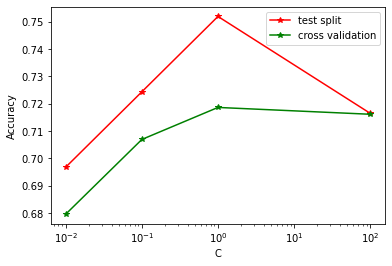

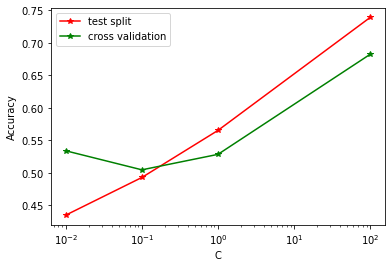

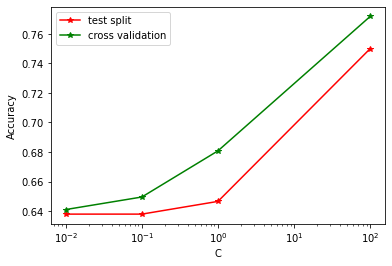

In [78]:
#plot for a range of C values
C = [0.01,0.1,1,100]
datasets = [diabetes, sonar, ionosphere]


for data in datasets:
    plt.figure()
    split_acc = []
    cv_acc = []
    for c in C:
        _, test_acc, cross_val, _ = svm_classification(data, C = c, kernel='poly', degree=5)
        split_acc.append(test_acc)
        cv_acc.append(cross_val)
    plt.plot(C,split_acc,'r*-', label = 'test split')
    plt.plot(C,cv_acc,'g*-', label = 'cross validation')
    plt.xscale('log')
    plt.legend()
    plt.xlabel('C')
    plt.ylabel('Accuracy')

In [58]:
C

array([1.00000000e-02, 2.15443469e-01, 4.64158883e+00, 1.00000000e+02])